In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Cargar el dataset
df = pd.read_csv("BuenosA.csv")  # reemplaza con el nombre correcto
df2 = pd.read_csv("Mexico.csv")  # reemplaza con el nombre correcto

df.head(5)

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Candela,01/10/2009,New York NY,within an hour,100,79,1,Palermo,['email' 'phone'],t,...,5.0,1.0,4.82,4.93,4.88,4.93,4.98,4.93,4.86,0.29
1,María,03/08/2016,Buenos Aires Argentina,within an hour,100,100,0,Not specified,['email' 'phone'],t,...,8.0,1.0,4.77,4.76,4.77,4.82,4.90,4.87,4.75,0.80
2,Monica,02/12/2009,No location,Not defined,0,0,0,Not specified,[],f,...,0.0,0.0,4.80,4.76,4.80,4.90,4.80,4.90,4.80,0.27
3,Elbio Mariano,21/12/2009,Buenos Aires Argentina,within an hour,95,94,1,Monserrat,['email' 'phone'],t,...,0.0,0.0,4.80,4.59,4.80,4.83,4.80,4.90,4.80,0.27
4,Sergio,31/01/2010,Buenos Aires Argentina,within an hour,100,99,0,Palermo Hollywood,['email' 'phone'],t,...,25.0,2.0,4.93,4.92,4.87,4.94,4.93,4.93,4.79,1.84



==================== Buenos Aires ====================
📘 Modelo matemático:
availability_30 = 0.000000 * price + -0.003720 * host_acceptance_rate + 14.997416
📊 Índice de correlación de Pearson: -0.0049
📈 Índice de determinación (R²): 0.0009


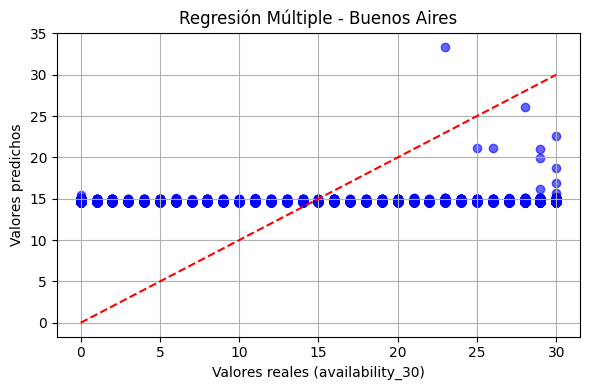


==================== México ====================
📘 Modelo matemático:
availability_30 = 0.000011 * price + 0.009915 * host_acceptance_rate + 14.244973
📊 Índice de correlación de Pearson: 0.0113
📈 Índice de determinación (R²): 0.0004


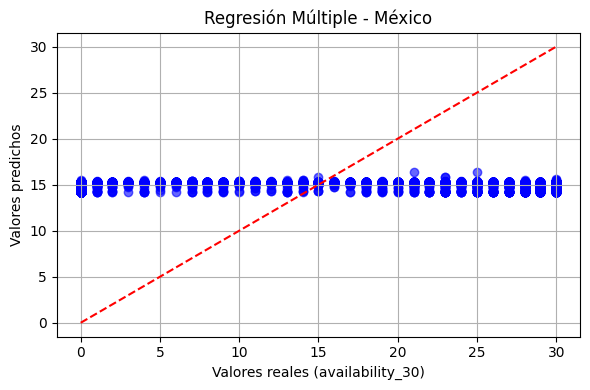


📊 Comparativa de Regresión Múltiple:

         Ciudad                                  Modelo Matemático  Pearson r  \
0  Buenos Aires  availability_30 = 0.000000 * price + -0.003720...    -0.0049   
1        México  availability_30 = 0.000011 * price + 0.009915 ...     0.0113   

       R²  
0  0.0009  
1  0.0004  


In [4]:
# Lista para almacenar resultados
resultados = []
# ---------- FUNCIÓN PARA REGRESIÓN MÚLTIPLE ----------
def regresion_multiple_tabla(df, nombre_df):
    # 1. Variables necesarias
    columnas = ['price', 'host_acceptance_rate', 'availability_30']
    if not all(col in df.columns for col in columnas):
        print(f"⚠️ Faltan columnas en {nombre_df}. Se omite.")
        return

    # 2. Limpieza
    df_clean = df[columnas].dropna()

    # 3. Definir variables
    X = df_clean[['price', 'host_acceptance_rate']]
    y = df_clean['availability_30']

    # 4. Separar datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Crear y entrenar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 6. Predicciones
    y_pred = model.predict(X_test)

    # 7. Métricas
    r2 = r2_score(y_test, y_pred)
    pearson_corr = pd.Series(y_test).corr(pd.Series(y_pred))
    coef1, coef2 = model.coef_
    intercept = model.intercept_
    modelo = f"availability_30 = {coef1:.6f} * price + {coef2:.6f} * host_acceptance_rate + {intercept:.6f}"

    resultados.append({
        "Ciudad": nombre_df,
        "Modelo Matemático": modelo,
        "Pearson r": round(pearson_corr, 4),
        "R²": round(r2, 4)
    })
    # 8. Resultados
    print(f"\n==================== {nombre_df} ====================")
    print("📘 Modelo matemático:")
    print(modelo)
    print(f"📊 Índice de correlación de Pearson: {pearson_corr:.4f}")
    print(f"📈 Índice de determinación (R²): {r2:.4f}")

    # 9. Visualización
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Valores reales (availability_30)")
    plt.ylabel("Valores predichos")
    plt.title(f"Regresión Múltiple - {nombre_df}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- EJECUCIÓN PARA AMBOS DATAFRAMES ----------
#regresion_multiple(df, "Buenos Aires")
#regresion_multiple(df2, "México")

# Ejecutar análisis para ambos
regresion_multiple_tabla(df, "Buenos Aires")
regresion_multiple_tabla(df2, "México")

# Mostrar tabla resumen
tabla_comparativa = pd.DataFrame(resultados)
print("\n📊 Comparativa de Regresión Múltiple:\n")
print(tabla_comparativa)